#  SET 4

### Bahador Amjadi
### Matricula:  2040470

#### **please do not run the code with other data files (names of the files are differnet from the orginal names)

In [49]:
library(ggplot2)
library(reshape2)
library(lubridate)
library(tibble)
library(dplyr)

## Exercise 1

In [50]:
csv.reader   <- function(country.iso){
    return(read.csv(sprintf("./2022_%s_Region_Mobility_Report.csv", country.iso)))}

#a function which drops the redundant columns of dataframe
df.cleaner   <- function(df){
    df$country_region_code <- NULL   
    df[2:7]                <- list(NULL)   #droping unnecessary coloumns  
    df$country_region      <- NULL
    return(df)}

#a function for plotting the dataframe in a melted shape
#melt.plotter.1 plots varibale as color and country as wrap
melt.plotter.1 <- function(df, time.period){   
    ggplot(data = df, aes(x = date, y = value , color = variable)) +
    labs(title = sprintf("%s Averaged Variables of Several Countries Over Time (Colored by Variables)",
                         time.period),
    x = "Date",
    y = "Value") +
    geom_line(size=0.9, alpha=0.9) +
    facet_wrap(.~country , nrow = 3) +
    theme(legend.position="bottom")}

#melt.plotter.2 plots country as color and variable as wrap
melt.plotter.2 <- function(df, time.period){ 
    ggplot(data = df, aes(x = date, y = value , color = country)) +
    labs(title = sprintf("%s Averaged Variables of Several Countries Over Time (Colored by Countries)", 
                         time.period),
    x = "Date",
    y = "Value") +
    geom_line(size=0.9, alpha=0.9) +
    facet_wrap(.~variable , nrow = 3) +
    theme(legend.position="bottom")}

#a function which takes a dataset and returns the weekly averaged dataframe
weekly.summarizer <- function(df){
    df$week <- floor_date(as.Date(df$date), 'week')
    counter <- 0
    for (var in variable.list[2:length(variable.list)]){
        if (counter== 0){
        df.week <- df %>% group_by(week) %>% summarize(varib = mean(eval(parse(text = var)), na.rm = TRUE))   
        counter <- counter <- counter +1 }
        else {
        temp    <- df %>% group_by(week) %>% summarize(varib = mean(eval(parse(text = var)), na.rm = TRUE)) 
        df.week <- cbind(df.week,temp[2])    }}
    colnames(df.week) <- variable.list
    return(df.week)}

#a function which takes a dataset and returns the monthly averaged dataframe
monthly.summarizer <- function(df){
    df$month <- floor_date(as.Date(df$date), 'month')
    counter <- 0
    for (var in variable.list[2:length(variable.list)]){
        if (counter== 0){
        df.month <- df %>% group_by(month) %>% summarize(varib = mean(eval(parse(text = var)), na.rm = TRUE))   
        counter <- counter <- counter +1 }
        else {
        temp    <- df %>% group_by(month) %>% summarize(varib = mean(eval(parse(text = var)), na.rm = TRUE)) 
        df.month <- cbind(df.month,temp[2])    }}
    colnames(df.month) <- variable.list
    return(df.month)}

In [51]:
#needed for summarizing weekly and monthly
variable.list <<-  c("date", 
                    "retail_and_recreation_percent_change_from_baseline",	
                    "grocery_and_pharmacy_percent_change_from_baseline",	
                    "parks_percent_change_from_baseline",	
                    "transit_stations_percent_change_from_baseline",	
                    "workplaces_percent_change_from_baseline",
                    "residential_percent_change_from_baseline")

options(repr.plot.width=11, repr.plot.height =10)  #changing size of plots

In [52]:
country.list <- c("Italy", "Netherlands", "Denmark", "Spain", "France", "Finland")

counter <- 0
for (count in country.list){   #storing all datas of differnet countries in one dataframe
    if (counter ==0){
        #here 4 functinos are sequentially applied on the csv file
        #we take a csv file, read it, clean it, summarize it and finally melt all of them to a single DF
        df.week <-   melt(weekly.summarizer(df.cleaner(csv.reader(count))),id.vars='date',variable.name='variable')
        df.month <-  melt(monthly.summarizer(df.cleaner(csv.reader(count))),id.vars='date',variable.name='variable')
        df.week$country <- count
        df.month$country <- count}
    else{ 
        temp.week<-melt(weekly.summarizer(df.cleaner(csv.reader(count))),id.vars='date',variable.name='variable')
        temp.month<-melt(monthly.summarizer(df.cleaner(csv.reader(count))),id.vars='date',variable.name='variable')
        temp.week$country  <- count
        temp.month$country <- count
        df.week            <- rbind(df.week,  temp.week )
        df.month           <- rbind(df.month, temp.month)}
    counter <- counter + 1}

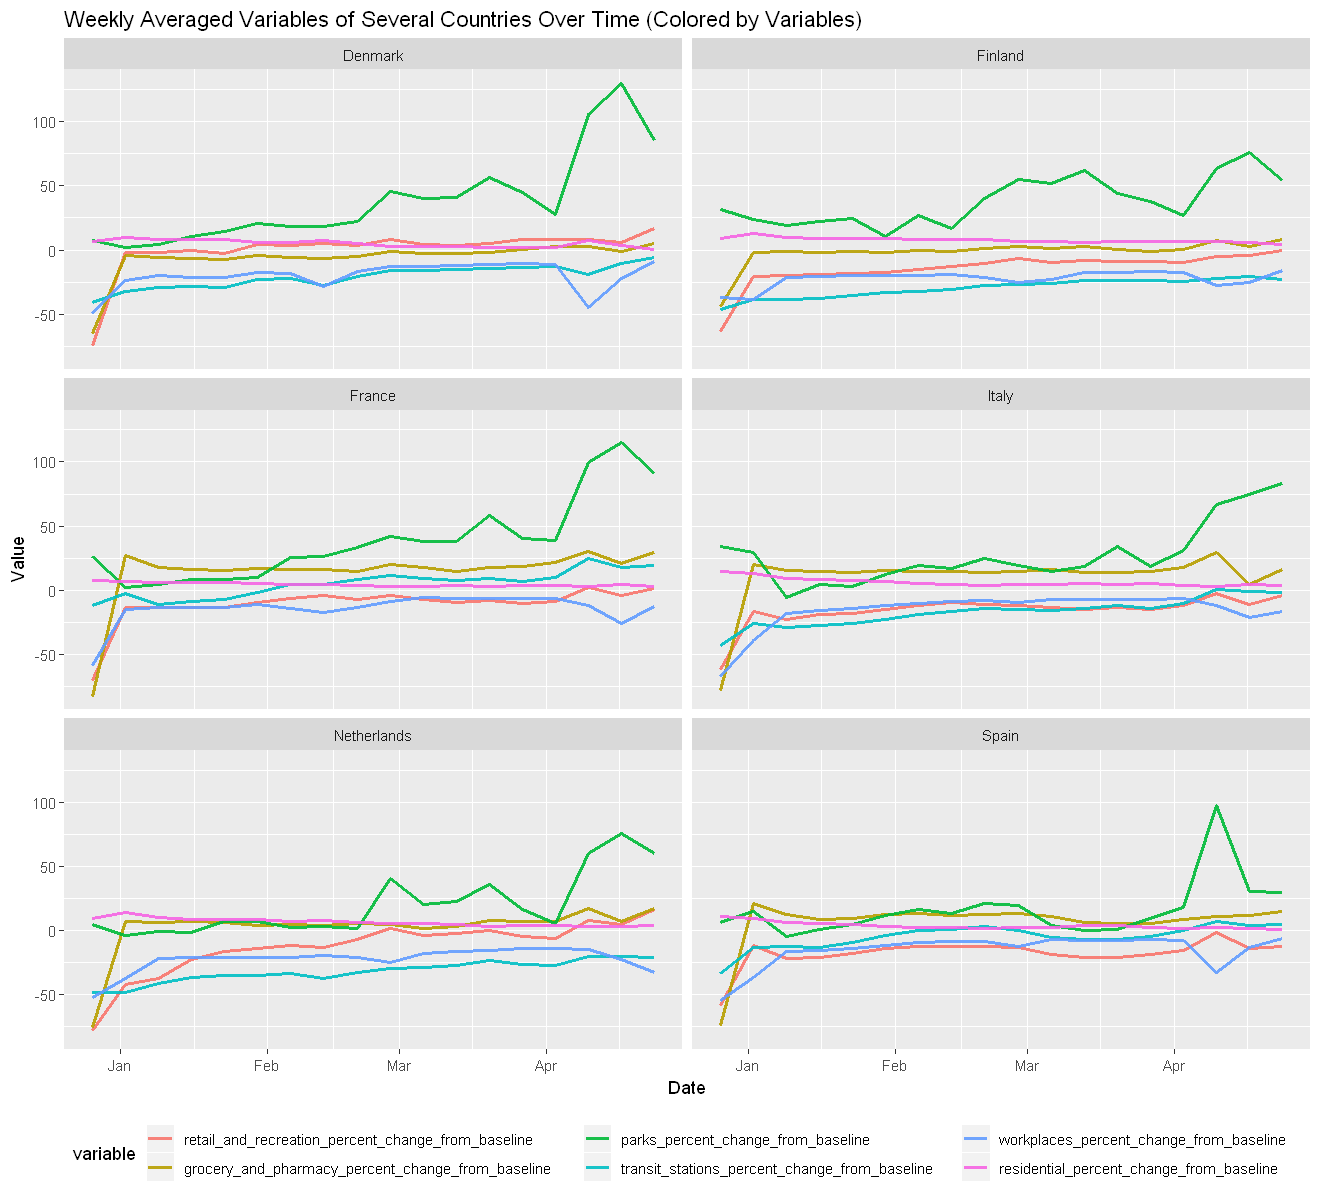

In [54]:
melt.plotter.1(df.week, "Weekly") #melt.plotter.1 plots varibale as color and country as wrap

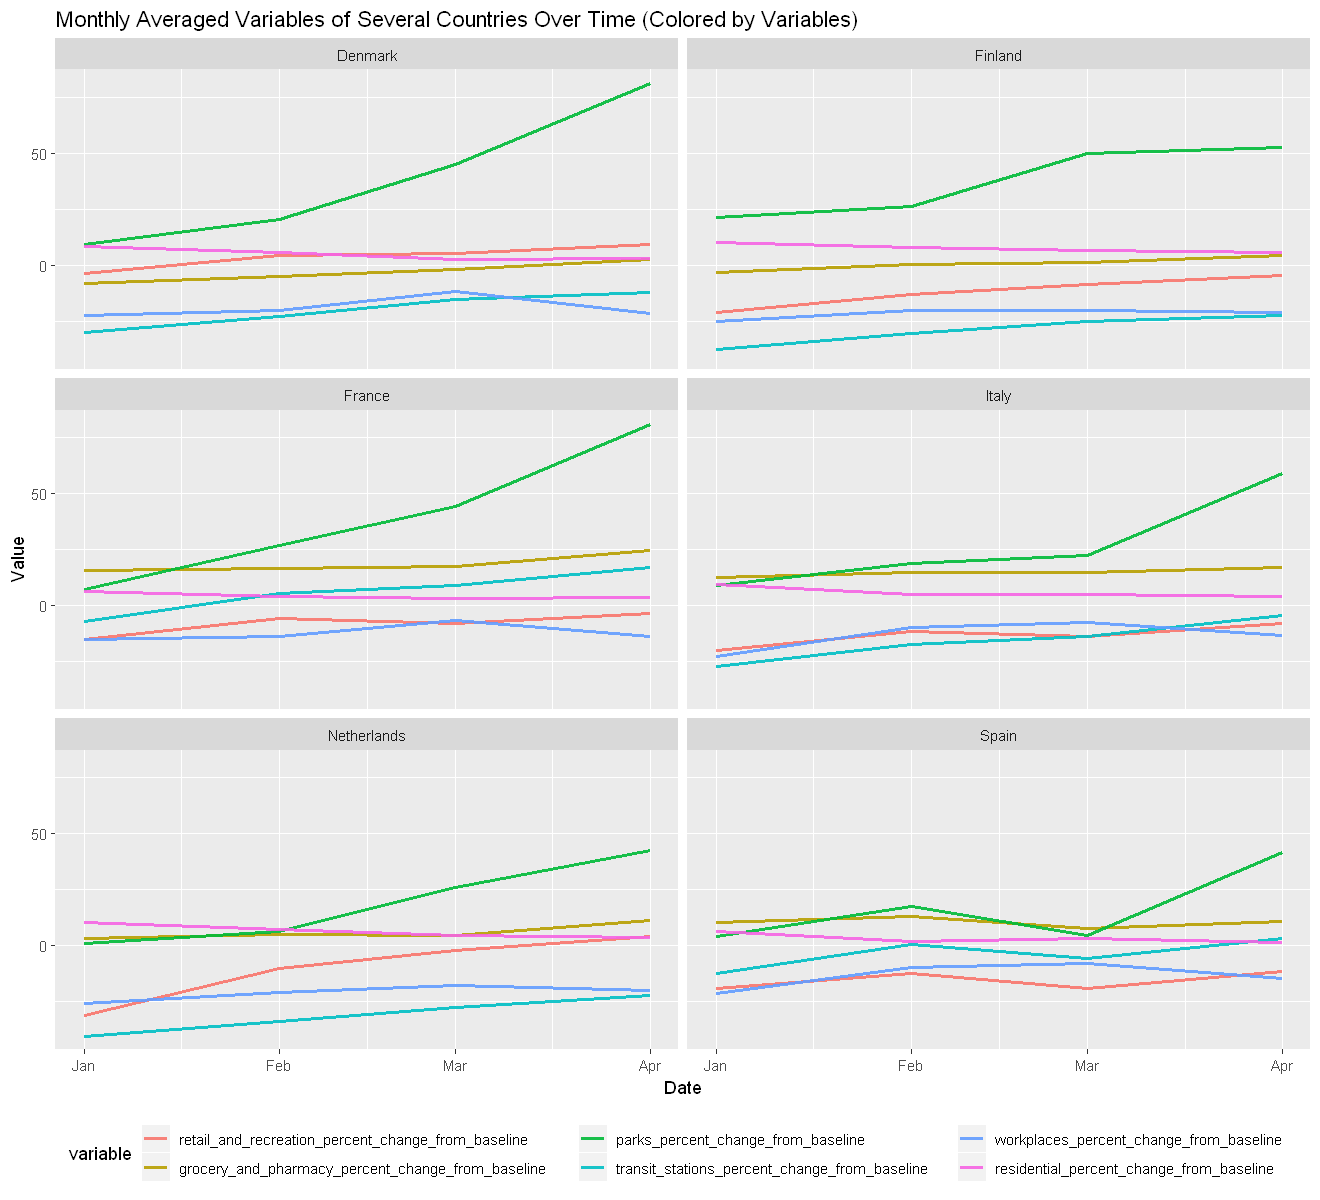

In [55]:
melt.plotter.1(df.month, "Monthly") #melt.plotter.1 plots varibale as color and country as wrap

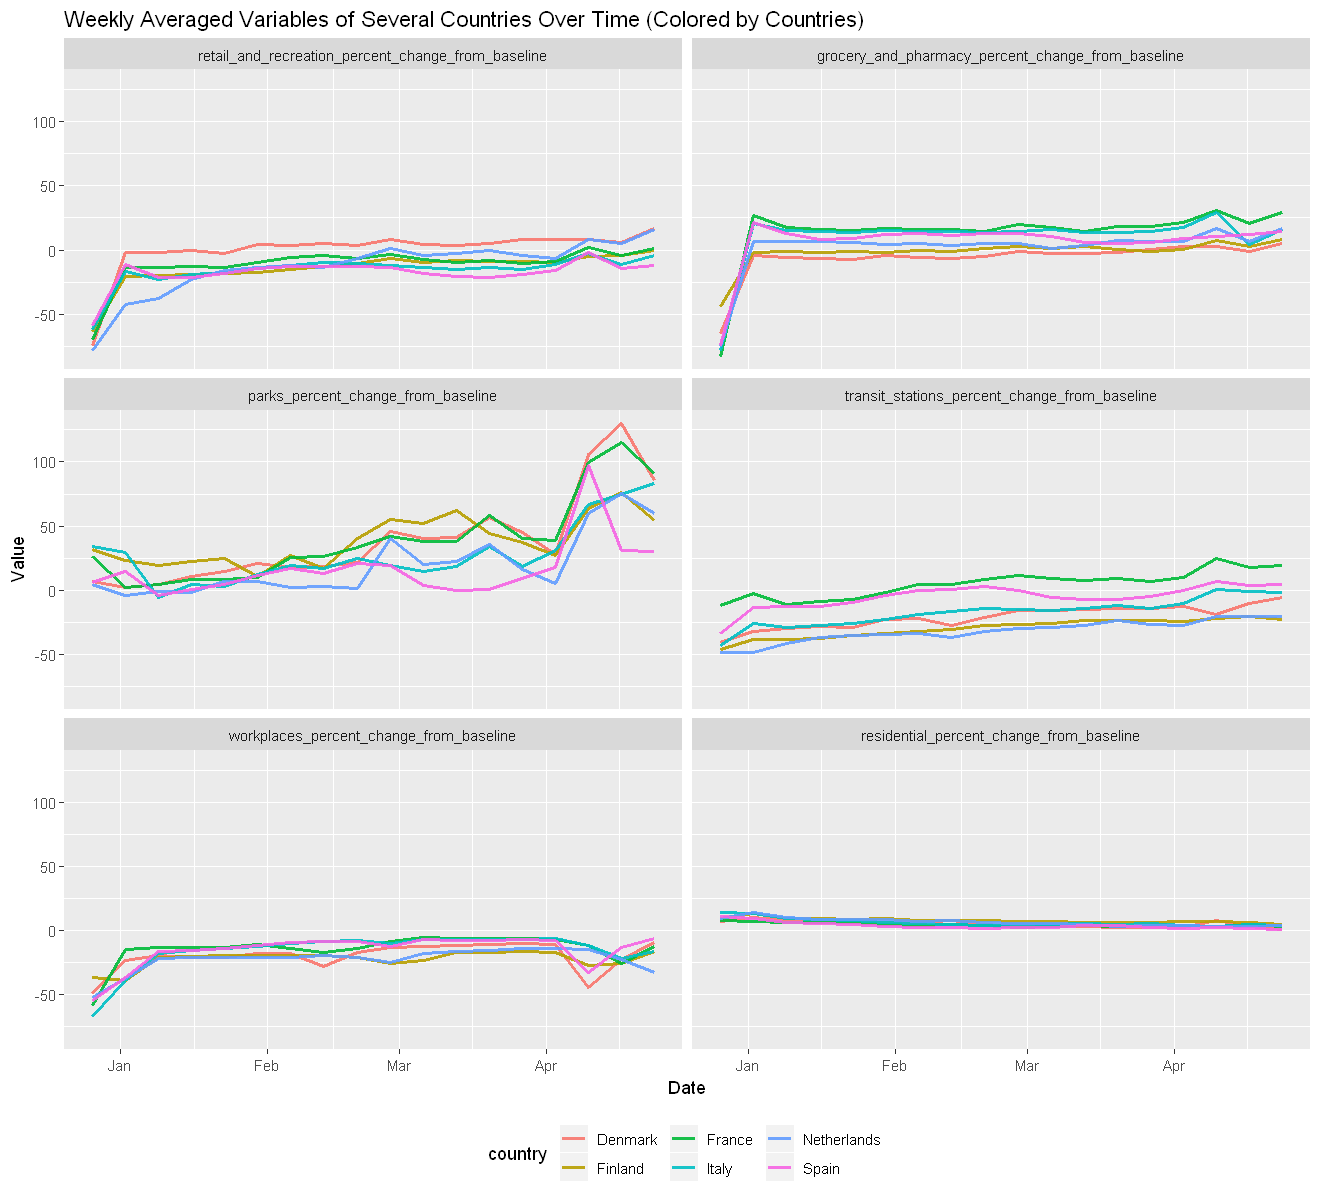

In [58]:
melt.plotter.2(df.week, "Weekly") #melt.plotter.2 plots country as color and variable as wrap

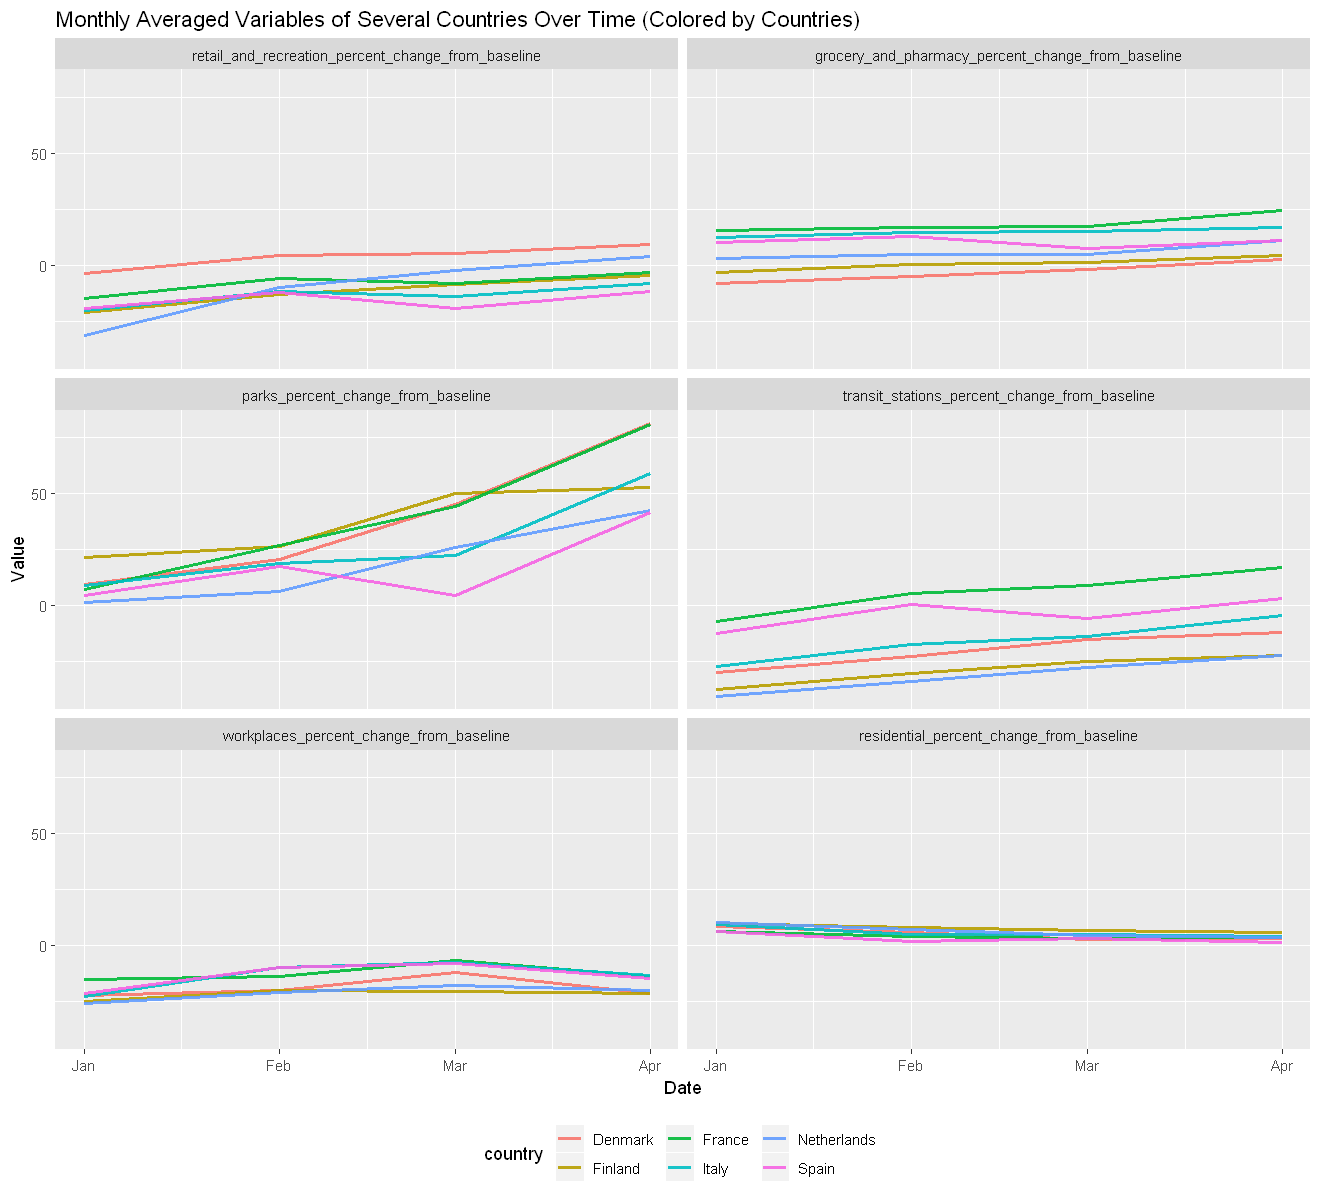

In [59]:
melt.plotter.2(df.month, "Monthly") #melt.plotter.2 plots country as color and variable as wrap

## Exercise 2

In [60]:
char.split      <- function(number){return(unlist(strsplit(as.character(number),"")))}
number.recovery <- function(char)  {return(as.numeric(paste(char , collapse="")))}

mid.square      <- function(){
    input.num   <- as.numeric(readline(prompt = "Please Enter a Number:"))
    first.num   <- char.split(input.num)
    squared.num <- char.split(input.num**2)
    #we should consider two general case, symmetric and asymmetric divisions
    digit.difference <- length(squared.num) - length(first.num)
                
    #symmertric division, the difference between number of digits should be dividable by 2
    if  (digit.difference  %%2 == 0){
        left.start <- 1 + digit.difference/2
        right.end    <- length(squared.num) - digit.difference/2
        output<- number.recovery(squared.num[left.start:right.end])} 

    #Asmmetric division, the differnece is an odd number, and considering an example of 3 digits 
    #differnce, 2 digits is removed from the end and 1 from the beggining, it will also be applied
    #for higher differences in digits cases
    else{
        left.start   <- (1 + digit.difference)/2
        right.end    <- length(squared.num) - (1 + digit.difference)/2
        output<- number.recovery(squared.num[left.start:right.end])}
        
    cat("The Generated Random Number:", output) }    

In [61]:
mid.square()

Please Enter a Number:43834
The Generated Random Number: 21419

## Exercise 3

In [62]:
#two functions that calculate alpha and beta given E(x) and STD(x)
beta.func  <- function(exp.x, std.x){return((((1-exp.x)*exp.x)/((std.x)**2) - 1) / (1+ exp.x/(1-exp.x)))}
alpha.func <- function(exp.x, std.x){return((exp.x/(1-exp.x))*(((1-exp.x)*exp.x)/((std.x)**2) - 1) / (1+ exp.x/(1-exp.x)))}

# a function that plots prior, posterior, likelihood at the same time
all.plotter <- function(n,r,prior, exp.x, std.x, ylim ){
    if (prior == 'Beta'){
        alpha.prior <- alpha.func(exp.x, std.x ); beta.prior <- beta.func (exp.x, std.x )}
    else if(prior == 'Uniform'){alpha.prior<- 1; beta.prior <-1}
    else {cat("unrecognized prior function!")}
        
    p.prior <- dbeta(x=p,alpha.prior ,beta.prior) #can be eigther flat or beta    
    p.like  <- dbinom(x=r, size=n, prob=p)
    p.like  <- p.like /( delta.p*sum(p.like ))
    p.post  <- dbeta(x=p, shape1=alpha.prior+r, shape2=beta.prior+n-r) 
    plot(p, p.prior , col="navyblue",lwd = 2.6,type="l", xlim=c(0,1),
         ylim = ylim,xlab="P", ylab="Density")
    lines(p, p.like , col="firebrick3",lwd=2.6, lty=3,xlab="P", ylab="Density")
    lines(p, p.post , col="black",lwd=2.6,xlab="P", ylab="Density")
    legend(0.55,6,legend=c("Prior", "Likelihood", "Posterior"), lty=1:2, cex=0.8,
           col=c("navyblue", "firebrick3", "black"), box.lty=0, text.font=4)
    title(main=paste(prior, "Prior, Posterior and Likelihood Dist.","r/n =",r,"/",n), line=0.7, cex.main=1)}

In [63]:
#fixing some global paramteres
Nsamp <<- 200; delta.p <- 1/Nsamp
p     <<- seq(from=1/(2*Nsamp),by=1/Nsamp ,length.out=Nsamp)
options(repr.plot.width=11, repr.plot.height =6)  #changing size of plots

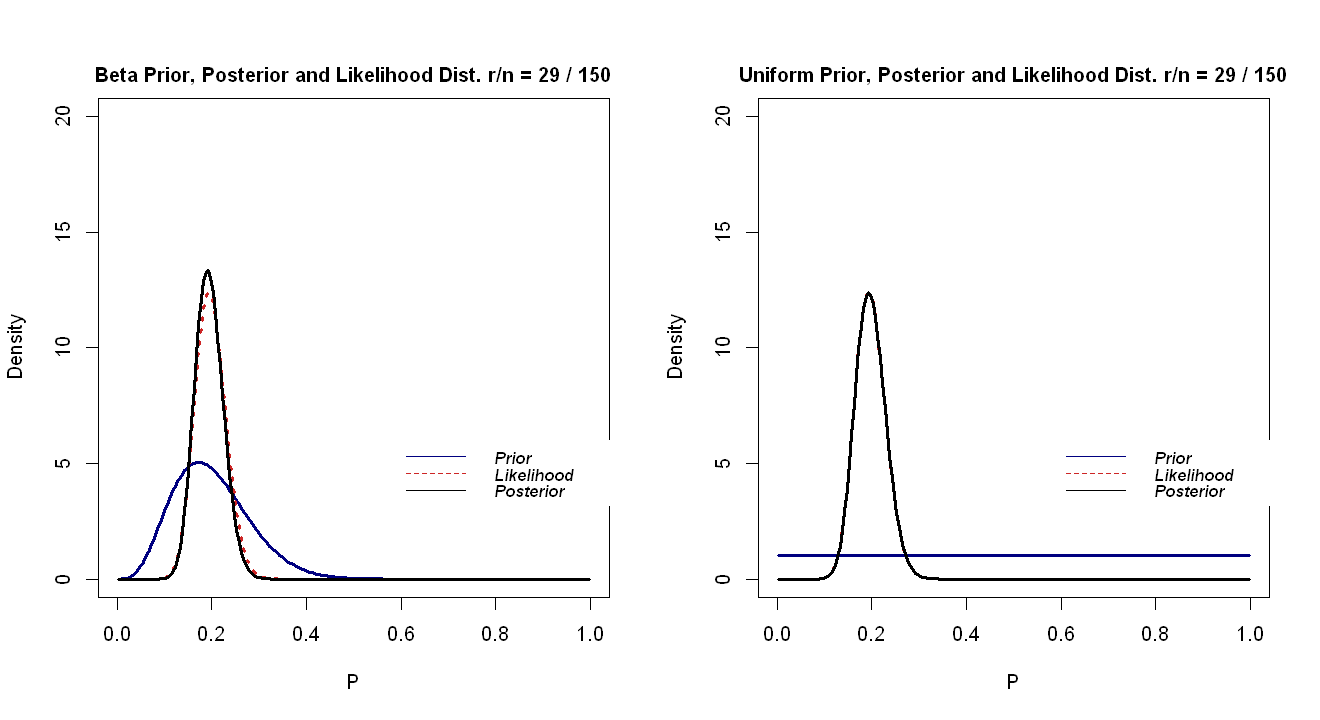

In [64]:
n <- 150 
r <- 29
#I assume a beta prior
exp.x <- 0.2
std.x <- 0.08

par(mfrow=c(1,2))
ylim <- c(0,20)  #setting the y axis range
#all.plotter(n,r, prior function, E[x], STD[x]), in case of unifrom dummy exp and std
all.plotter(n, r,'Beta',    exp.x, std.x, ylim)
all.plotter(n, r,'Uniform', exp.x, std.x, ylim)

## Exercise 4

In [65]:
#posterior function, for integrating purpose
post.func <- function(x){
    if (prior == 'Beta'){alpha.prior <- alpha.func(exp.x, std.x); beta.prior <- beta.func (exp.x, std.x )}
    else if(prior == 'Uniform'){alpha.prior<- 1; beta.prior <-1}
    else {cat("unrecognized prior function!")}
    return(dbeta(x, shape1=alpha.prior+r, shape2=beta.prior+n-r))}

#a function that finds 95 credibility interval
cred.finder <- function(post.function){
    k <-0; integral <-1; interval <- 0.95
    while (integral > 0.95){k <- k + 0.01; integral <- integrate(post.function, k,1-k)$value}
    return (c(k, 1-k))}

#a function which find the most probable value
most.prob <- function(n,r, prior, exp.x,std.x){
    a  <- alpha.func(exp.x, std.x)
    b  <- beta.func (exp.x, std.x)
    if (prior=='Beta'){return((r+a-1)/(n+a+b-2))}
    else if (prior =='Uniform'){return(r/n)}}

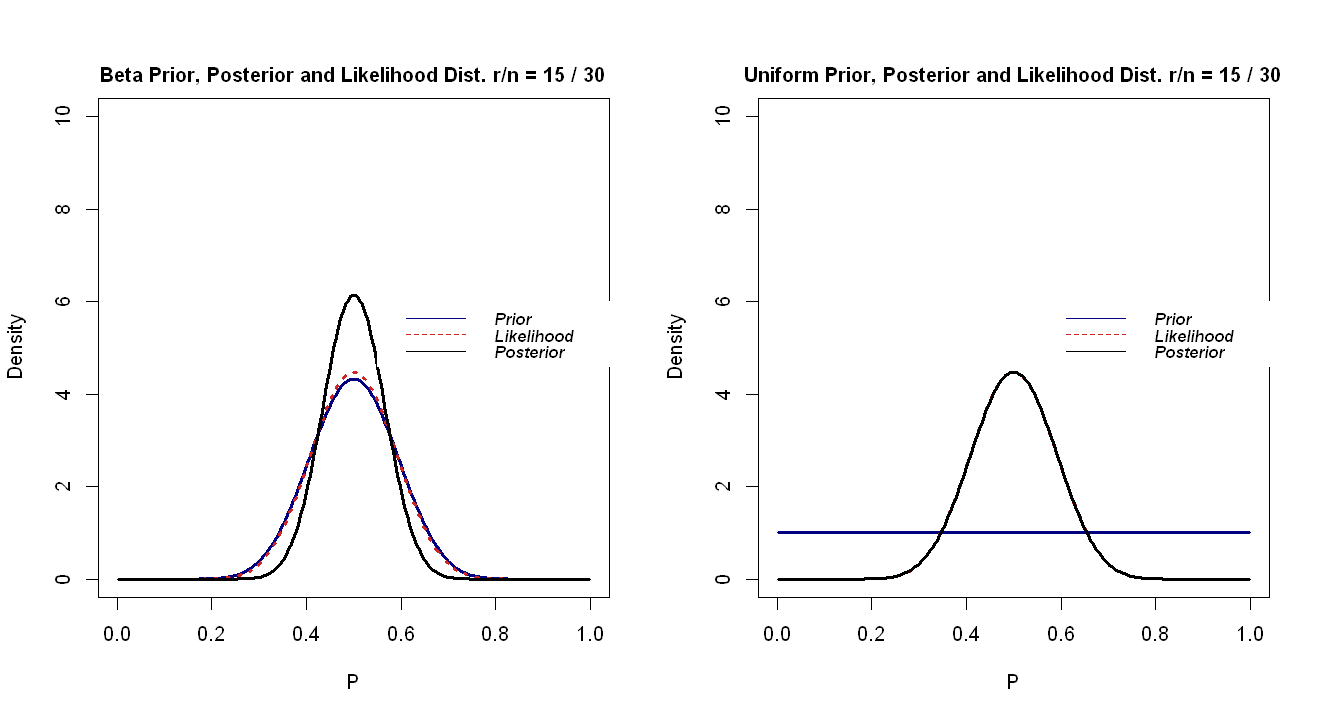

In [66]:
n <- 30 
r <- 15
exp.x <- 0.5
std.x <- 0.09

par(mfrow=c(1,2))
ylim <- c(0,10)  #setting the y axis range
all.plotter(n, r,'Beta', exp.x,    std.x, ylim)
all.plotter(n, r,'Uniform', exp.x, std.x, ylim)

In [67]:
cat("The Most Probable Value for the Uniform dist. is",   most.prob(n,r, "Uniform", exp.x, std.x))
cat("\nThe Most Probable Value for the Beta dist. is"   , most.prob(n,r, "Beta", exp.x,std.x))

The Most Probable Value for the Uniform dist. is 0.5
The Most Probable Value for the Beta dist. is 0.5

In [68]:
prior="Beta"
cat("The 0.95 Credibility Interval for Beta Prior is",      cred.finder(post.func))
prior="Uniform"
cat("\nThe 0.95 Credibility Interval for Uniform Prior is", cred.finder(post.func))

The 0.95 Credibility Interval for Beta Prior is 0.38 0.62
The 0.95 Credibility Interval for Uniform Prior is 0.34 0.66

In [70]:
#part c
data.seq <-c('T', 'T', 'T', 'T', 'T', 'H', 'T', 'T', 'H', 'H', 'T', 'T', 'H', 'H','H',
             'T', 'H', 'T', 'H', 'T', 'H', 'H', 'T', 'H', 'T', 'H', 'T', 'H', 'H','H')
uni.most.prob      <- vector(); beta.most.prob      <- vector()
uni.cred.interval1 <- vector(); beta.cred.interval1 <- vector(); number.coin.toss<- vector()
uni.cred.interval2 <- vector(); beta.cred.interval2 <- vector()

r <- 0; n <- 0 
exp.x<- 0.4; std.x<- 0.09; interval <- 0.95 #these values remain constatns
for (t in seq(1,length(data.seq))){
    n <- n+1
    number.coin.toss  <- append(number.coin.toss, t)
    
    if (data.seq[t] =='H'){r <- r+1}
    
    uni.most.prob     <- append(uni.most.prob     , most.prob(n, r, 'Uniform', 0.4, 0.09))
    beta.most.prob    <- append(beta.most.prob    , most.prob(n, r, 'Beta', 0.4, 0.09))
    
    prior="Uniform"
    uni.cred.interval1 <- append(uni.cred.interval1 , cred.finder(post.func)[1])
    uni.cred.interval2 <- append(uni.cred.interval2 , cred.finder(post.func)[2])
    
    prior="Beta"
    beta.cred.interval1<- append(beta.cred.interval1, cred.finder(post.func)[1])
    beta.cred.interval2<- append(beta.cred.interval2, cred.finder(post.func)[2])}

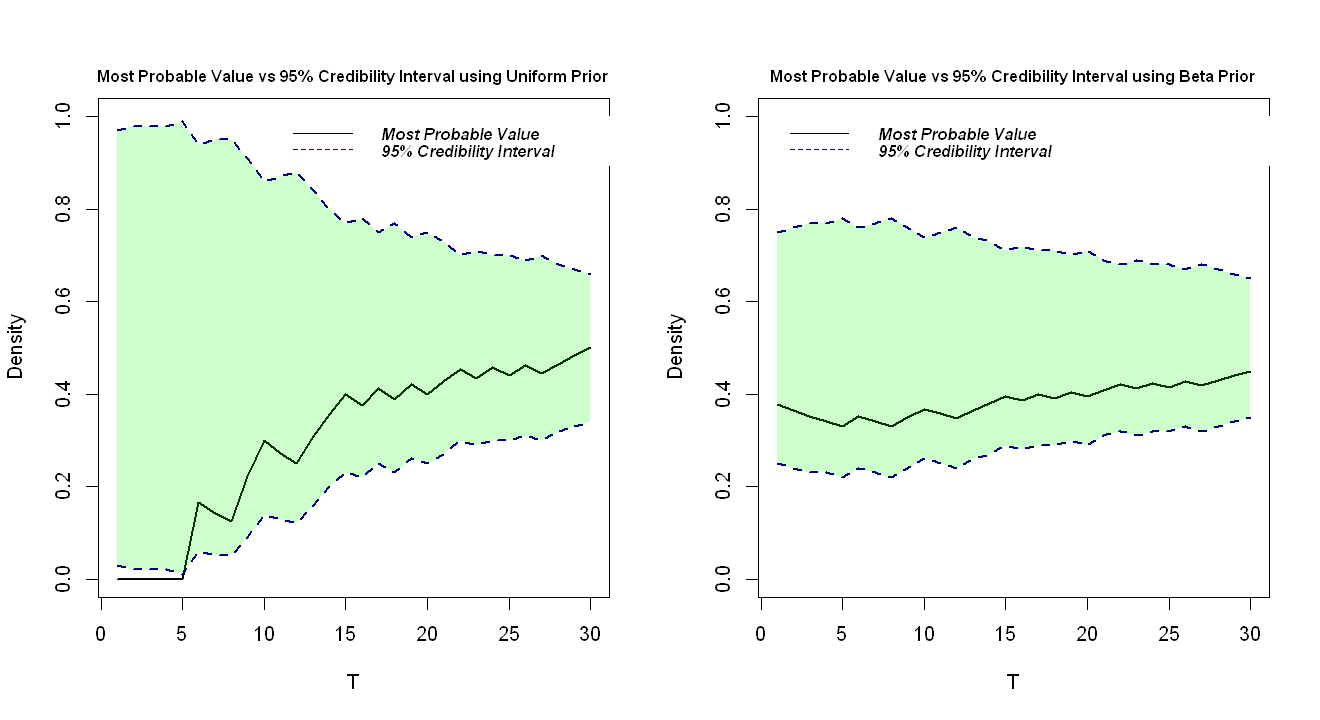

In [87]:
options(repr.plot.width=11, repr.plot.height =6)  #changing size of plots
par(mfrow=c(1,2))
plot(number.coin.toss ,col="gray0",  uni.most.prob ,ylim = c(0,1)  ,lwd = 2 ,type="l" ,xlab="T", ylab="Density"   )
polygon(c(1:30, 30:1), c(uni.cred.interval1, rev(uni.cred.interval2)),col = rgb(0, 1, 0, alpha=0.2), border = NA)
lines(number.coin.toss,  uni.cred.interval1   ,lwd = 2, lty='dashed', col ='navyblue' )
lines(number.coin.toss,  uni.cred.interval2  ,lwd = 2,  lty='dashed', col = 'navyblue')
title(main=paste("Most Probable Value vs 95% Credibility Interval using Uniform Prior"), line=0.7, cex.main=0.8)
legend(10,1,legend=c("Most Probable Value", "95% Credibility Interval"), lty=1:2, cex=0.8,
           col=c("gray0", "navyblue"), box.lty=0, text.font=4)

plot(number.coin.toss  ,col="gray0", beta.most.prob, ylim = c(0,1), type="l",lwd = 2,xlab="T", ylab="Density")
polygon(c(1:30, 30:1), c(beta.cred.interval1, rev(beta.cred.interval2)),col = rgb(0, 1, 0, alpha=0.2), border = NA)
lines(number.coin.toss , beta.cred.interval1,lwd = 2,  lty='dashed' , col='navyblue')
lines(number.coin.toss , beta.cred.interval2,lwd = 2,  lty='dashed' ,col ='navyblue')
title(main=paste("Most Probable Value vs 95% Credibility Interval using Beta Prior"), line=0.7, cex.main=0.8)
legend(0,1,legend=c("Most Probable Value", "95% Credibility Interval"), lty=1:2, cex=0.8,
           col=c("gray0", "navyblue"), box.lty=0, text.font=4)

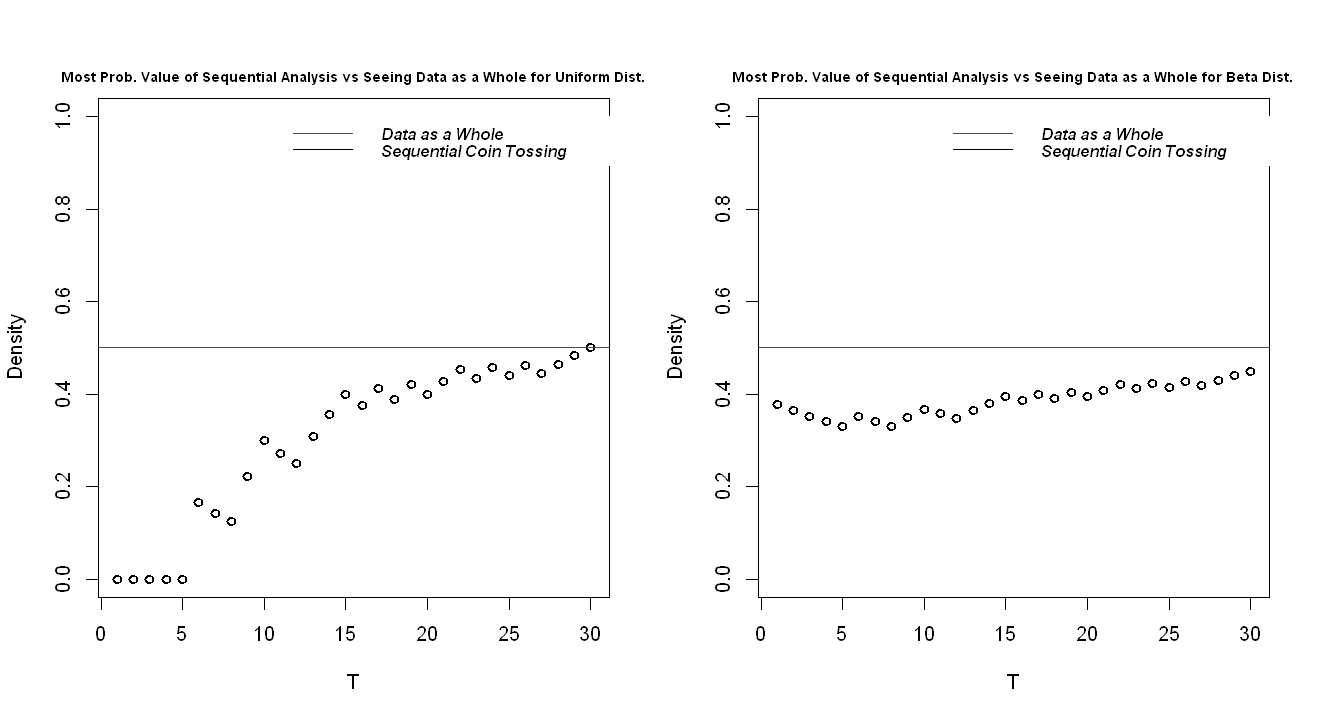

In [72]:
#part d
par(mfrow=c(1,2))
plot(number.coin.toss ,col="gray0",  uni.most.prob ,ylim = c(0,1)  ,lwd = 2 ,xlab="T", ylab="Density"   )
abline(h=0.5, col="red")
title(main=paste("Most Prob. Value of Sequential Analysis vs Seeing Data as a Whole for Uniform Dist."), line=0.7, cex.main=0.7)
legend(10,1,legend=c("Data as a Whole", "Sequential Coin Tossing"), lty=1:1, cex=0.8,
           col=c("red", "gray0"), box.lty=0, text.font=4)

plot(number.coin.toss  ,col="gray0", beta.most.prob, ylim = c(0,1),lwd = 2,xlab="T", ylab="Density")
abline(h=0.5, col="red")
title(main=paste("Most Prob. Value of Sequential Analysis vs Seeing Data as a Whole for Beta Dist."), line=0.7, cex.main=0.7)
legend(10,1,legend=c("Data as a Whole", "Sequential Coin Tossing"), lty=1:1, cex=0.8,
           col=c("red", "gray0"), box.lty=0, text.font=4)

As we can see, in the case of sequential coin tossing, the most probable value converges to the one obtained from seeing the data as a whole